Chapter 19

# 基于梯度的数值优化
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码实现了**梯度下降法**用于优化二次函数，并通过可视化展示了梯度下降的迭代过程和收敛行为。以下从数学角度详细描述代码的功能、数学公式以及可视化的目的。

---

### 1. **目标函数与数学背景**

#### 目标函数
定义目标函数为一个简单的二次多项式：
$$
f(x) = 2x^2 - 8x + 1
$$
该函数的导数（梯度）为：
$$
f'(x) = \frac{d}{dx}(2x^2 - 8x + 1) = 4x - 8
$$

目标是通过数值优化方法找到函数的最小值点 $x^*$ 和最小值 $f(x^*)$。

#### 梯度下降法
梯度下降法是一种迭代优化方法，其核心思想是沿着函数梯度的负方向更新变量，以逐步逼近最优解。其更新公式为：
$$
x_{k+1} = x_k - \eta f'(x_k)
$$
其中：
- $x_k$ 是第 $k$ 次迭代时的变量；
- $\eta$ 是学习率（步长），控制更新的幅度；
- $f'(x_k)$ 是目标函数在 $x_k$ 处的梯度。

迭代终止条件是：
1. 当前更新的变量变化小于容差 $tol$：
   $$
   |x_{k+1} - x_k| < tol
   $$
2. 达到最大迭代次数。

---

### 2. **梯度下降的实现**

代码通过 `gradient_descent` 函数实现了上述迭代过程：
1. 初始点为 $x_0$；
2. 计算梯度 $f'(x_k)$，根据梯度下降公式更新变量；
3. 若两次迭代之间的变量变化小于 $tol$，则认为收敛并终止。

---

### 3. **可视化梯度下降过程**

#### 可视化内容
函数 `visualize_gradient_descent_with_convergence` 生成三个子图：
1. **目标函数及梯度下降轨迹**：
   - 展示目标函数 $f(x)$ 的曲线；
   - 用点标记梯度下降的迭代点 $(x_k, f(x_k))$；
   - 连线显示迭代过程的路径。

2. **变量 $x_k$ 的变化**：
   - 绘制迭代过程中 $x_k$ 的变化图；
   - 横轴为迭代次数，纵轴为 $x_k$ 的值，反映变量收敛到最优解的过程。

3. **函数值 $f(x_k)$ 的变化**：
   - 绘制目标函数值 $f(x_k)$ 的变化；
   - 横轴为迭代次数，纵轴为 $f(x_k)$ 的值，反映函数值逐步逼近最小值。

#### 直观分析
- 子图 1 展示了梯度下降法如何沿着函数的下降方向逼近最优解；
- 子图 2 和子图 3 展示了变量和目标函数值的收敛趋势。

---

### 4. **测试与结果**

#### 初始条件
选择初始点 $x_0 = 5$ 和学习率 $\eta = 0.1$，进行梯度下降迭代。

#### 收敛结果
- 梯度下降找到的最小值点 $x^*$ 为：
  $$
  x^* = \frac{-b}{2a} = \frac{8}{4} = 2
  $$
- 对应的最小值为：
  $$
  f(x^*) = 2(2)^2 - 8(2) + 1 = -7
  $$

#### 实际计算结果
代码的输出与理论值一致，表明梯度下降法有效地找到最优解。

---

### 5. **结论与应用**

#### 梯度下降法的优点
梯度下降法是一种高效的数值优化方法，特别适用于函数导数容易计算的场景。其收敛速度受学习率 $\eta$ 的影响，合适的学习率可以在较少的迭代次数内逼近最优解。

#### 应用场景
梯度下降广泛应用于机器学习、数据科学和优化领域，例如：
- 参数估计；
- 最小化损失函数；
- 大规模数据优化。

#### 可视化意义
通过可视化，梯度下降的过程从数值计算转化为直观的轨迹，可以更好地理解优化路径及收敛行为。本案例的函数简单明确，适合作为梯度下降法的入门示例。

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify

In [2]:
p = plt.rcParams  # 获取默认绘图参数
p["font.sans-serif"] = ["Roboto"]  # 设置无衬线字体为 Roboto
p["font.weight"] = "light"  # 设置字体粗细为 light
p["ytick.minor.visible"] = True  # 显示 y 轴的小刻度
p["xtick.minor.visible"] = True  # 显示 x 轴的小刻度
p["axes.grid"] = True  # 启用坐标轴网格
p["grid.color"] = "0.5"  # 设置网格颜色为灰色
p["grid.linewidth"] = 0.5  # 设置网格线宽度

## 目标函数

In [3]:
x = symbols('x')
func = 2*x**2 - 8*x + 1
func

2*x**2 - 8*x + 1

In [4]:
grad = diff(func, x)  # 计算函数的导数
grad

4*x - 8

In [5]:
# 将函数和梯度转换为 Python 可执行函数

In [6]:
f = lambdify(x, func, 'numpy')
grad_f = lambdify(x, grad, 'numpy')

## 梯度下降实现

In [7]:
def gradient_descent(f, grad_f, x0, learning_rate=0.1, max_iter=50, tol=1e-6):
    x_vals = [x0]
    for _ in range(max_iter):
        grad_val = grad_f(x_vals[-1])  # 计算当前点的梯度
        x_new = x_vals[-1] - learning_rate * grad_val  # 按梯度更新
        x_vals.append(x_new)
        if abs(x_new - x_vals[-2]) < tol:  # 如果变化小于容差，停止迭代
            break
    return x_vals

## 可视化梯度下降过程和收敛

In [8]:
def visualize_gradient_descent_with_convergence(f, x_vals):
    x = np.linspace(-1, 5, 500)  # 设置绘图范围
    y = f(x)

    # 获取收敛的函数值和对应的最小值点
    f_vals = [f(val) for val in x_vals]
    iterations = np.arange(len(x_vals))

    # 创建图像，分三行一列
    fig, axs = plt.subplots(3, 1, figsize=(8, 6), 
                            height_ratios=[2, 1, 1],
                            constrained_layout=True)

    # 图1：目标函数及梯度下降过程
    axs[0].plot(x, y, label="f(x)", color="blue")
    axs[0].scatter(x_vals, f_vals, color="k", marker = 'x', label="Iterations")
    axs[0].plot(x_vals, f_vals, linestyle="-", color="red", alpha=0.6)
    axs[0].set_title("Gradient Descent Optimization")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("f(x)")
    axs[0].set_xlim(-1,5)
    axs[0].legend()
    axs[0].grid(True)

    # 图2：收敛过程中最小值点的变化
    axs[1].plot(iterations, x_vals, marker="x", label="x value", color="green")
    axs[1].set_xlabel("Iteration")
    axs[1].set_ylabel("Optimized x")
    axs[1].legend()
    axs[1].set_xlim(iterations.min(),iterations.max())
    axs[1].grid(True)

    # 图3：收敛过程中最小值点的变化
    axs[2].plot(iterations, f_vals, marker="x", label="f(x)", color="blue")
    axs[2].set_xlabel("Iteration")
    axs[2].set_ylabel("Optimized min of f(x)")
    axs[2].legend()
    axs[2].set_xlim(iterations.min(),iterations.max())
    axs[2].grid(True)
    
    plt.show()

## 测试梯度下降

In [9]:
x0 = 5  # 初始点
learning_rate = 0.1
x_vals = gradient_descent(f, grad_f, x0, learning_rate)

In [10]:
print(f"梯度下降找到的最小值点: {x_vals[-1]}")
print(f"最小值: {f(x_vals[-1])}")

梯度下降找到的最小值点: 2.0000011053695985
最小值: -6.999999999997556


## 可视化

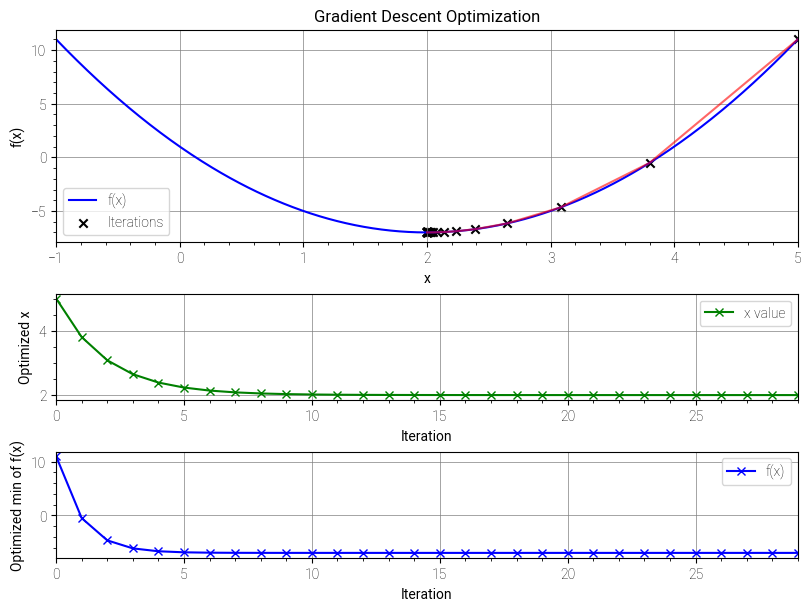

In [11]:
visualize_gradient_descent_with_convergence(f, x_vals)